# Bitacora para el manejo de secuencias fasta y busqueda basica de *Blastn*


<img src="img/blast.png" class="center" width = 60%>

# Blastn

## Para el siguiente ejercicio es necesario tener el Blast+ instalado en la computadora
https://www.ncbi.nlm.nih.gov/guide/data-software/
## y tener instalada la base de datos de taxonomica

<img src="img/ncbi_descarga_bd.png" class="center" width = 60%>

## Revise el manual del Blast para mayor información
https://www.ncbi.nlm.nih.gov/books/NBK279690/

In [12]:
cd ~/Desktop/Bioinformatica2019/data/fasta/

/Users/migueldelrio/Desktop/bioinformatica2019/data/fasta


In [13]:
ls 

Nav1.2F.fa          PET1.2F.fasta       PETsn1.2F.fasta     secuencias10.dnd
Nav1.2F.fasta       PET1.8F.fasta       PETsn1.8F.fasta     secuencias10.fasta
Nav1.8F.fasta       PET2.2F.fasta       PHBb1.2F.fasta
Nav2.2F.fasta       PET2.8F.fasta       secuencias10.aln


In [22]:
%%bash
date
export BLASTDB=~/Desktop/bigdata/16SMicrobial/

time blastn \
-query secuencias10.fasta \
-db ~/Desktop/bigdata/16SMicrobial/16SMicrobial \
-out secuencias10.tab \
-evalue 1E-6 \
-max_target_seqs 1 \
-num_threads 2 \
-outfmt "6 std sskingdoms stitle staxids sscinames scomnames sblastnames" 

date

Wed Jan 30 12:07:33 CST 2019
Wed Jan 30 12:07:34 CST 2019



real	0m1.441s
user	0m2.325s
sys	0m0.079s


### Revise el manual del Blast y describa qué valores obtendrá en el archivo de salida

## para conocer el numero de secuencias con resultado 

In [23]:
!wc -l secuencias10.tab

      10 secuencias10.tab


In [24]:
!head secuencias10.tab

PET1.8F	NR_152090.1	100.000	302	0	0	2	303	1477	1176	4.96e-159	558	Bacteria	Pseudomonas oceani strain DSM 100277 16S ribosomal RNA, partial sequence	1708783	Pseudomonas oceani	Pseudomonas oceani	g-proteobacteria
PHBb1.2F	NR_112983.1	100.000	288	0	0	2	289	1402	1115	2.86e-151	532	Bacteria	Litoreibacter janthinus strain KMM 3842 16S ribosomal RNA gene, partial sequence	670154	Litoreibacter janthinus	Litoreibacter janthinus	a-proteobacteria
PET1.2F	NR_148798.1	98.052	308	4	2	1	306	1466	1159	8.45e-152	534	Bacteria	Pseudomonas populi strain KBL-4-9 16S ribosomal RNA, partial sequence	1500966	Pseudomonas populi	Pseudomonas populi	g-proteobacteria
Nav2.2F	NR_148756.1	97.840	324	6	1	1	323	1483	1160	5.32e-159	558	Bacteria	Alteromonas mediterranea strain DE 16S ribosomal RNA, complete sequence	314275	Alteromonas mediterranea	Alteromonas mediterranea	g-proteobacteria
PETsn1.2F	NR_148756.1	100.000	304	0	0	1	304	1483	1180	3.85e-160	562	Bacteria	Alteromonas mediterranea strain DE 16S ribosomal RNA, co

## se requiere visualizar los datos, para ello se utiliza el manejo de bases de datos que tiene Python

### se cargan las bibliotecas correspondientes

In [25]:
from pandas import Series, DataFrame
import pandas as pd

###  Blast da los resultados sin nombre de columnas, por lo que se asignan a la variable "encabezado"

In [26]:
encabezado =("qseqid", "sseqid", "pident", "length", "mismatch", "gapopen","qstart", 
             "qend", "sstart","send", "evalue", "bitscore", "sskingdoms", "stitle", 
             "staxids", "sscinames", "scomnames", "sblastnames")

### Se lee el archivo de salida y se asigna a la variable "ftab", con ello se pueden ver los resultados

In [27]:
ftab=pd.read_table("secuencias10.tab", header=None , names= encabezado)
ftab

,qseqid,sseqid,pident,length,mismatch,gapopen,qstart,qend,sstart,send,evalue,bitscore,sskingdoms,stitle,staxids,sscinames,scomnames,sblastnames
0,PET1.8F,NR_152090.1,100.000,302,0,0,2,303,1477,1176,4.960000e-159,558,Bacteria,Pseudomonas oceani strain DSM 100277 16S ribos...,1708783,Pseudomonas oceani,Pseudomonas oceani,g-proteobacteria
1,PHBb1.2F,NR_112983.1,100.000,288,0,0,2,289,1402,1115,2.860000e-151,532,Bacteria,Litoreibacter janthinus strain KMM 3842 16S ri...,670154,Litoreibacter janthinus,Litoreibacter janthinus,a-proteobacteria
2,PET1.2F,NR_148798.1,98.052,308,4,2,1,306,1466,1159,8.450000e-152,534,Bacteria,Pseudomonas populi strain KBL-4-9 16S ribosoma...,1500966,Pseudomonas populi,Pseudomonas populi,g-proteobacteria
3,Nav2.2F,NR_148756.1,97.840,324,6,1,1,323,1483,1160,5.320000e-159,558,Bacteria,Alteromonas mediterranea strain DE 16S ribosom...,314275,Alteromonas mediterranea,Alteromonas mediterranea,g-proteobacteria
4,PETsn1.2F,NR_148756.1,100.000,304,0,0,1,304,1483,1180,3.850000e-160,562,Bacteria,Alteromonas mediterranea strain DE 16S ribosom...,314275,Alteromonas mediterranea,Alteromonas mediterranea,g-proteobacteria
5,Nav1.8F,NR_025241.1,99.032,310,2,1,1,309,1478,1169,6.560000e-158,555,Bacteria,Bacillus aquimaris strain TF-12 16S ribosomal ...,189382,Bacillus aquimaris,Bacillus aquimaris,firmicutes
6,PET2.8F,NR_148756.1,98.457,324,4,1,1,323,1483,1160,2.460000e-162,569,Bacteria,Alteromonas mediterranea strain DE 16S ribosom...,314275,Alteromonas mediterranea,Alteromonas mediterranea,g-proteobacteria
7,PETsn1.8F,NR_148756.1,98.418,316,3,2,28,343,1473,1160,7.360000e-158,555,Bacteria,Alteromonas mediterranea strain DE 16S ribosom...,314275,Alteromonas mediterranea,Alteromonas mediterranea,g-proteobacteria
8,Nav1.2F,NR_151897.1,95.469,309,13,1,1,308,1495,1187,5.200000e-139,492,Bacteria,Bacillus nakamurai strain NRRL B-41091 16S rib...,1793963,Bacillus nakamurai,Bacillus nakamurai,firmicutes
9,PET2.2F,NR_148756.1,99.071,323,2,1,1,323,1481,1160,4.110000e-165,579,Bacteria,Alteromonas mediterranea strain DE 16S ribosom...,314275,Alteromonas mediterranea,Alteromonas mediterranea,g-proteobacteria


### Describa que es lo que esta observando y que puede decir de todas las secuencias 

### Con el fin de resumir la informacion se agruparan considerando el nombre cientifico (sscinames), contando el numero de casos en donde se encontro una asignacion

In [28]:
ftab1= ftab.groupby("sscinames")["qseqid"].count()
ftab1 = DataFrame(ftab1)
ftab1

,qseqid
sscinames,
Alteromonas mediterranea,5
Bacillus aquimaris,1
Bacillus nakamurai,1
Litoreibacter janthinus,1
Pseudomonas oceani,1
Pseudomonas populi,1


## para guardar esta informacion se utiliza

In [29]:
ftab1.to_csv("secuencias_especies.csv")

### Que diferencia hay si utiliza estos comandos?

In [30]:
ftab1= ftab.groupby("sscinames")["qseqid"].count()
ftab1

sscinames
Alteromonas mediterranea    5
Bacillus aquimaris          1
Bacillus nakamurai          1
Litoreibacter janthinus     1
Pseudomonas oceani          1
Pseudomonas populi          1
Name: qseqid, dtype: int64

## cuál considera mas facil de leer?

## Para graficar los resultados se cargan las bibliotecas pylab y matplotlib
Ya vienen integrados con el python y no es necesario descargarlos. Si requiere información adicional:
https://matplotlib.org


In [31]:
import pylab
import matplotlib.pyplot as plt
%matplotlib inline

## que hace al último comando?
%matplotlib inline

## para graficar 

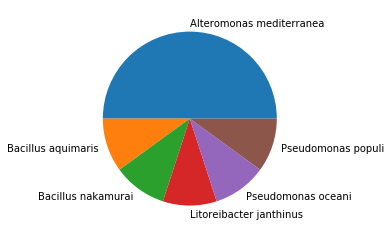

In [32]:
plt.pie(ftab1,
       labels=ftab1.index
       )
plt.show()

### revise el manual del plt.pi y modifique los comandos para que en la grafica se observen todas las leyendas sin traslaparse

In [52]:
?plt.pie

save figure


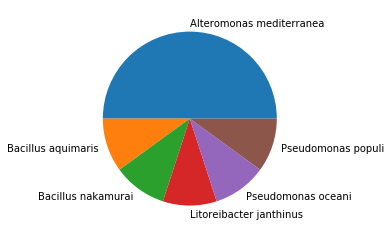

In [33]:
plt.pie(ftab1,
        labels=ftab1.index,
       )
yes = input("save figure")
if yes.lower()=="y":
    plt.savefig('../imagenes/secuencias_pie.png', 
                dpi=800, bbox_inches='tight')

plt.show()



save figure


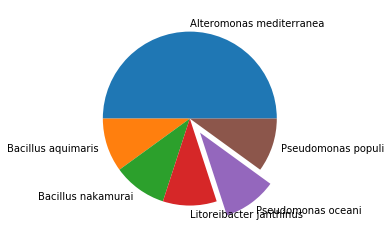

In [36]:
plt.pie(ftab1,
        labels=ftab1.index,
       explode= (0 ,0 ,0,0,0.2,0))
yes = input("save figure")
if yes.lower()=="y":
    plt.savefig('../imagenes/secuencias_pie.png', 
                dpi=800, bbox_inches='tight')

plt.show()



In [37]:
len(ftab1.index)

6

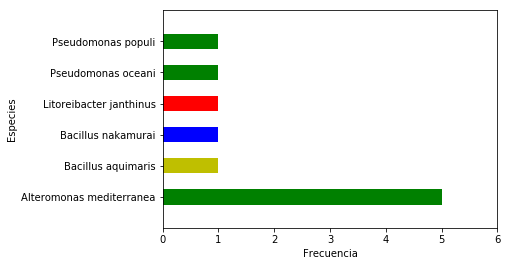

In [38]:
ftab1.plot(kind='barh', color=list('gybr'))
plt.axis([0, max (ftab1)+1, -1, len (ftab1.index)], label=None)
pylab.xlabel("Frecuencia")
pylab.ylabel("Especies")
plt.show()

In [39]:
ftab2 = ftab1.sort_values( ascending=True)
ftab2


sscinames
Bacillus aquimaris          1
Bacillus nakamurai          1
Litoreibacter janthinus     1
Pseudomonas oceani          1
Pseudomonas populi          1
Alteromonas mediterranea    5
Name: qseqid, dtype: int64

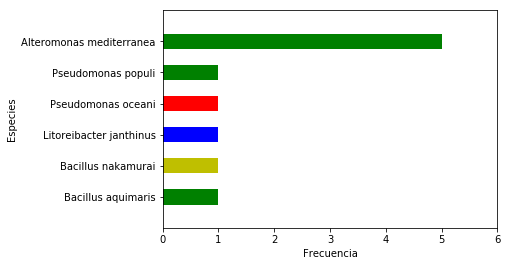

In [40]:
ftab2.plot(kind='barh', color=list('gybr'))
plt.axis([0, max (ftab1)+1, -1, len (ftab1.index)], label=None)
pylab.xlabel("Frecuencia")
pylab.ylabel("Especies")
plt.show()